In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [23]:
# https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks?resource=download
df = pd.read_csv('spotify_data.csv')

# Explorativna analyza
print(df.head())
print(df.shape)
print(df.info())

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("\nUnique categories in categorical variables:")
for col in categorical_columns:
    print(f"Column '{col}': {df[col].unique()}")


   Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   
3           3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz   
4           4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8   

   popularity  year     genre  danceability  energy  key  loudness  mode  \
0          68  2012  acoustic         0.483   0.303    4   -10.058     1   
1          50  2012  acoustic         0.572   0.454    3   -10.286     1   
2          57  2012  acoustic         0.409   0.234    3   -13.711     1   
3          58  2012  acoustic         0.392   0.251   10    -9.845     1   
4          54  2012  acoustic         0.430   0.791    6    -5.419     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0429      

In [24]:
popular_songs = df.query('popularity > 60')
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


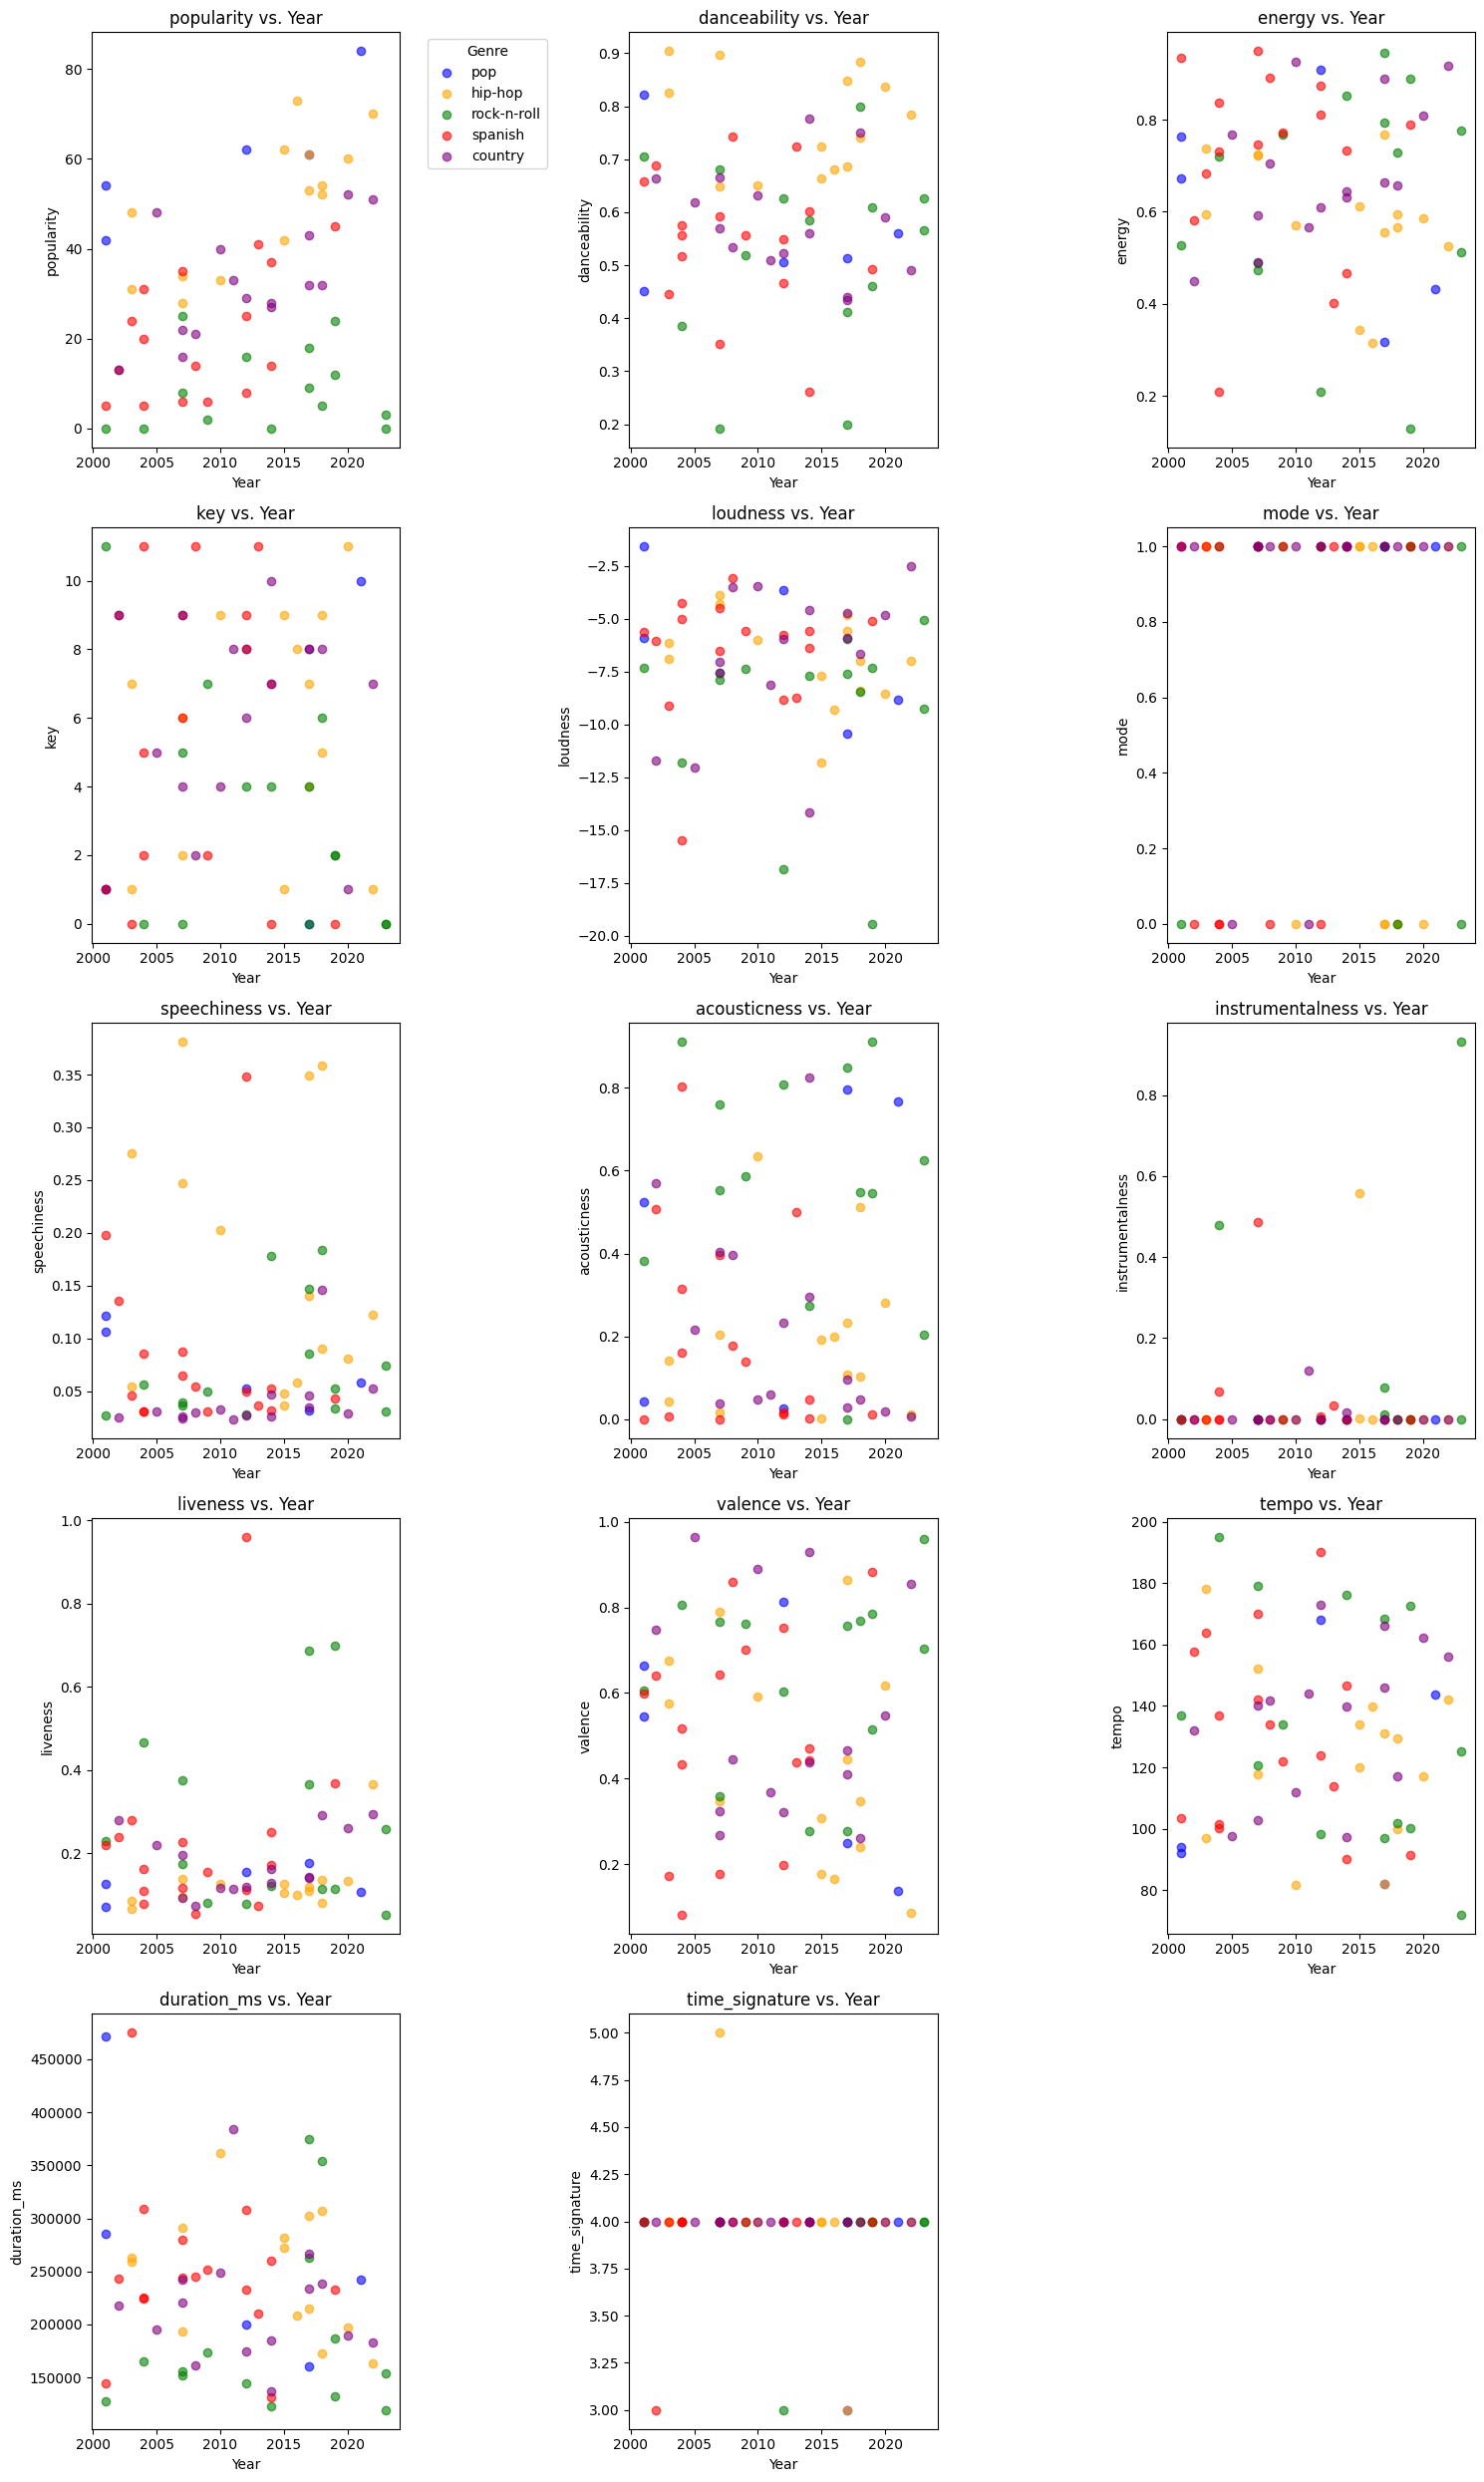

In [25]:
sample_size = 1000
sampled_df, _ = train_test_split(
    df,
    train_size=sample_size,
    stratify=df['genre'],
    random_state=42
)
selected_genres = ['pop','hip-hop','rock-n-roll','spanish','country']
filtered_df = sampled_df[sampled_df['genre'].isin(selected_genres)]

genre_colors = {
    'pop': 'blue',
    'hip-hop': 'orange',
    'rock-n-roll': 'green',
    'spanish': 'red',
    'country': 'purple'
}

features = [
    'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms', 'time_signature'
]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))
axes = axes.flatten()

for i, feature in enumerate(features):
    if i < len(axes):
        ax = axes[i]
        for genre in selected_genres:
            genre_data = filtered_df[filtered_df['genre'] == genre]
            ax.scatter(
                genre_data['year'],
                genre_data[feature],
                color=genre_colors[genre],
                alpha=0.6,
                label=genre if i == 0 else None,
            )
        ax.set_title(f"{feature} vs. Year")
        ax.set_xlabel("Year")
        ax.set_ylabel(feature)

axes[0].legend(title="Genre", loc='upper right', bbox_to_anchor=(1.5, 1))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Predikcia žánru (neupravený dataset)

In [26]:
sample_size = 1000

sampled_df, _ = train_test_split(
    df,
    train_size=sample_size,
    stratify=df['genre'],
    random_state=42
)
filtered_df = df[df['genre'].isin(selected_genres)]
print(filtered_df.shape)

(74870, 20)


In [27]:
X = filtered_df[['popularity', 'year', 'danceability', 'energy',	'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
Y = filtered_df['genre']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y)

In [ ]:
# Najblizsi sused
knn = KNeighborsClassifier(n_neighbors=19, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)
# print(cross_val_score(knn, X_scaled, Y, cv=5, scoring='accuracy'))

0.7136697247706422


In [ ]:
# hladanie parametrov pre knn
param_grid = {
    'n_neighbors': [19],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform','distance']
    # ,'leaf_size': [10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

results = grid_search.cv_results_
for rank, params, mean_score, std_score in zip(
    results['rank_test_score'],
    results['params'],
    results['mean_test_score'],
    results['std_test_score']
):
    print(f"Rank: {rank}, Params: {params}, Mean Accuracy: {mean_score:.4f}, Std Dev: {std_score:.4f}")

## Najlepsie vysledky
### sample_size = 10000:
k=19 acc = 0.14

k=19 acc = 0.209 (manhattan)

k=19 acc = 0.214 (manhattan)

k=19 acc = 0.19 (minkowski)

k=19 acc = 0.197 (cosine)

k=30 acc = 0.203 (manhattan)

### sample_size = 100000:
k=19 acc = 0.24
k=19 acc = 0.2627 (manhattan, distance)

In [ ]:
# hladanie najlepsieho k
param_grid = {'n_neighbors': range(1,20)} # 19
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best k: {grid_search.best_params_['n_neighbors']}")
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

Classification Report:
              precision    recall  f1-score   support

     country       0.67      0.72      0.69      2700
     hip-hop       0.75      0.83      0.79      2307
         pop       0.61      0.43      0.50       905
 rock-n-roll       0.85      0.85      0.85      2277
     spanish       0.65      0.61      0.63      2711

    accuracy                           0.72     10900
   macro avg       0.71      0.69      0.69     10900
weighted avg       0.71      0.72      0.71     10900


Confusion Matrix:
[[1941  161  109   98  391]
 [  77 1925   97    7  201]
 [ 196  226  390    6   87]
 [ 159    0    1 1925  192]
 [ 540  247   46  234 1644]]

Feature Importances:
popularity          0.224842
speechiness         0.131798
duration_ms         0.094899
danceability        0.092062
acousticness        0.080689
valence             0.062489
energy              0.061899
loudness            0.058896
tempo               0.052167
liveness            0.051355
instrumentalness

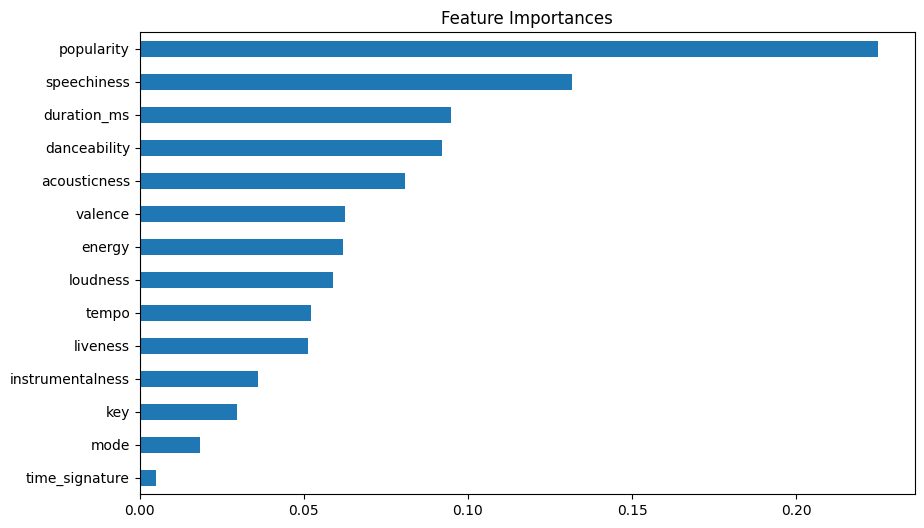

In [ ]:
features = [
    'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms', 'time_signature'
]
X = filtered_df[features]
Y = filtered_df['genre']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

feature_importances = pd.Series(rf.feature_importances_, index=features)
print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))

feature_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importances")
plt.show()

In [ ]:
print(f"Accuracy: {rf.score(X_val, y_val):.4f}")

Accuracy: 0.7179


In [ ]:
from itertools import product

n_estimators_options = [1000]
min_samples_split_options = [45, 60]
max_depth_options = [40, 100]

features = ['popularity', 'speechiness', 'duration_ms', 'danceability', 'energy']
X = filtered_df[features]
Y = filtered_df['genre']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=42)

for n_estimators, min_samples_split, max_depth in product(n_estimators_options, min_samples_split_options, max_depth_options):
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        max_depth=max_depth,
        random_state=42
    )
    rf.fit(X_train, y_train)

    accuracy = rf.score(X_val, y_val)
    print(f"n_estimators={n_estimators}, min_samples_split={min_samples_split}, max_depth={max_depth}, Accuracy={accuracy:.4f}")


n_estimators=50, min_samples_split=2, max_depth=None, Accuracy=0.6694

n_estimators=50, min_samples_split=2, max_depth=10, Accuracy=0.6728

n_estimators=50, min_samples_split=2, max_depth=20, Accuracy=0.6716

n_estimators=50, min_samples_split=2, max_depth=30, Accuracy=0.6722

n_estimators=50, min_samples_split=5, max_depth=None, Accuracy=0.6714

n_estimators=50, min_samples_split=5, max_depth=10, Accuracy=0.6746

n_estimators=50, min_samples_split=5, max_depth=20, Accuracy=0.6752

n_estimators=50, min_samples_split=5, max_depth=30, Accuracy=0.6675

n_estimators=50, min_samples_split=10, max_depth=None, Accuracy=0.6734

n_estimators=50, min_samples_split=10, max_depth=10, Accuracy=0.6726


n_estimators=50, min_samples_split=10, max_depth=20, Accuracy=0.6759

n_estimators=50, min_samples_split=10, max_depth=30, Accuracy=0.6732

n_estimators=100, min_samples_split=2, max_depth=None, Accuracy=0.6702

n_estimators=100, min_samples_split=2, max_depth=10, Accuracy=0.6735

n_estimators=100, min_samples_split=2, max_depth=20, Accuracy=0.6732

n_estimators=100, min_samples_split=2, max_depth=30, Accuracy=0.6746

n_estimators=100, min_samples_split=5, max_depth=None, Accuracy=0.6736

n_estimators=100, min_samples_split=5, max_depth=10, Accuracy=0.6750

n_estimators=100, min_samples_split=5, max_depth=20, Accuracy=0.6759

n_estimators=100, min_samples_split=5, max_depth=30, Accuracy=0.6720

n_estimators=100, min_samples_split=10, max_depth=None, Accuracy=0.6768

n_estimators=100, min_samples_split=10, max_depth=10, Accuracy=0.6734

n_estimators=100, min_samples_split=10, max_depth=20, Accuracy=0.6783

n_estimators=100, min_samples_split=10, max_depth=30, Accuracy=0.6758

n_estimators=200, min_samples_split=2, max_depth=None, Accuracy=0.6734

n_estimators=200, min_samples_split=2, max_depth=10, Accuracy=0.6747

n_estimators=200, min_samples_split=2, max_depth=20, Accuracy=0.6772

n_estimators=200, min_samples_split=2, max_depth=30, Accuracy=0.6745

n_estimators=200, min_samples_split=5, max_depth=None, Accuracy=0.6758

n_estimators=200, min_samples_split=5, max_depth=10, Accuracy=0.6742

n_estimators=200, min_samples_split=5, max_depth=20, Accuracy=0.6773

n_estimators=200, min_samples_split=5, max_depth=30, Accuracy=0.6720

n_estimators=200, min_samples_split=10, max_depth=None, Accuracy=0.6762

n_estimators=200, min_samples_split=10, max_depth=10, Accuracy=0.6734

n_estimators=200, min_samples_split=10, max_depth=20, Accuracy=0.6796

n_estimators=200, min_samples_split=10, max_depth=30, Accuracy=0.6801

n_estimators=300, min_samples_split=15, max_depth=40, Accuracy=0.6804

n_estimators=300, min_samples_split=15, max_depth=70, Accuracy=0.6804

n_estimators=300, min_samples_split=30, max_depth=40, Accuracy=0.6810

n_estimators=300, min_samples_split=30, max_depth=70, Accuracy=0.6810

In [ ]:
from collections import Counter
genre_counter = Counter(df['genre'])
sorted_genres = genre_counter.most_common()
print(sorted_genres)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

## Predikcia žánru (dataset s upravenými žánrami)

In [28]:
new_df = pd.read_csv("less_genres.csv")
new_df.shape

# vsetky features
features = [
    'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms', 'time_signature'
]
# finalne pouzite feaures (bez time_signature a duration_ms)
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'mode', 'key']

# pociatocne iba 5 najvplyvnejsich features podla RandomForestu (pravdepodobne underfitting)
# features = ['popularity', 'speechiness', 'duration_ms', 'danceability', 'energy']

X = new_df[features]
Y = new_df['genre']

# Encode target labels into integers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.regularizers import l2
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y_encoded, test_size=0.2, stratify=Y_encoded, random_state=42)

from tensorflow.keras.initializers import GlorotUniform, HeNormal, Orthogonal

In [29]:
new_df.shape

(1052157, 19)

In [ ]:
sample_size = 100000

sampled_df, _ = train_test_split(
    new_df,
    train_size=sample_size,
    stratify=new_df['genre'],
    random_state=42
)
X_sample = sampled_df[features]
Y_sample = sampled_df['genre']
Y_encoded = label_encoder.fit_transform(Y_sample)
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_sample, Y_sample, test_size=0.2, stratify=Y_encoded, random_state=42)

In [31]:
#KNN
knn = KNeighborsClassifier(n_neighbors=19, weights='distance', metric='manhattan')
knn.fit(X_train_s, y_train_s)
y_pred_s = knn.predict(X_val_s)
accuracy_s = accuracy_score(y_val_s, y_pred_s)
print(accuracy_s)
# print(cross_val_score(knn, X_scaled, Y, cv=5, scoring='accuracy'))

0.28515


In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
model = Sequential([
    Dense(30, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer=GlorotUniform(), kernel_regularizer=l2(0.02)),
    # Dense(25, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer=HeNormal()),
    Dense(20, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer=HeNormal()),
    Dense(len(label_encoder.classes_), activation='softmax', kernel_initializer=GlorotUniform())
])

from tensorflow.keras.optimizers import Adam
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=1.02,
    staircase=True
)

# Define the optimizer with the schedule
optimizer = Adam(learning_rate=lr_schedule, clipvalue=5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=2048, validation_data=(X_val, y_val))

# Evaluate the model
val_accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
print(f"Validation Accuracy: {val_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3255 - loss: 2.1538 - val_accuracy: 0.3732 - val_loss: 1.8849
Epoch 2/200
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3737 - loss: 1.8797 - val_accuracy: 0.3797 - val_loss: 1.8522
Epoch 3/200
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3806 - loss: 1.8531 - val_accuracy: 0.3811 - val_loss: 1.8436
Epoch 4/200
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3844 - loss: 1.8366 - val_accuracy: 0.3855 - val_loss: 1.8265
Epoch 5/200
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3867 - loss: 1.8263 - val_accuracy: 0.3906 - val_loss: 1.8178
Epoch 6/200
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3886 - loss: 1.8170 - val_accuracy: 0.3901 - val_loss: 1.8138
Epoch 7/200
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3890 - loss: 1.8123 - val_accuracy: 0.3888 - val_loss: 1.8057
Epoch 8/200
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3893 - loss: 1.8069 - val_accu

In [ ]:
# random forest na sample=10000, accuracy= 0.4090
# random forest na sample=100000, accuracy= 0.434
# random forest na sample=1000000, google ma zastavil lebo som nemal available RAM
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2)
rf.fit(X_train_s, y_train_s)

y_pred = rf.predict(X_val_s)
print(f"Accuracy: {rf.score(X_val_s, y_val_s):.4f}")